## 散点图
 


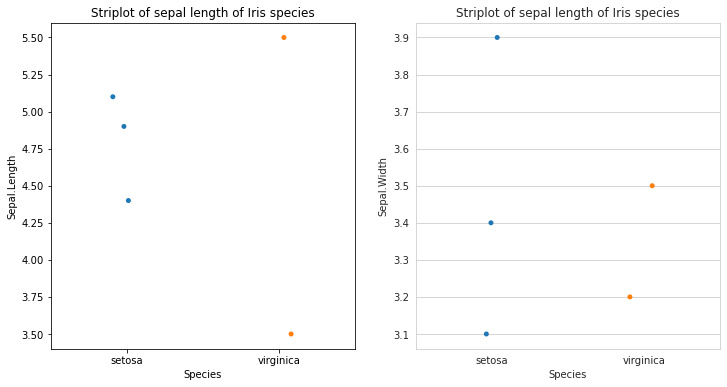

In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
iris = pd.DataFrame({'Sepal.Length':[5.1,4.9,4.4,3.5,5.5],'Sepal.Width':[3.1,3.9,3.4,3.2,3.5],'Petal.Length':[1.1,1.9,1.4,1.5,1.5],'Petal.Width':[0.1,0.9,0.4,0.4,0.5],'Species':['setosa','setosa','setosa','virginica','virginica',]})
plt.figure(1,figsize=(12,6))
#
plt.subplot(1,2,1)
sns.stripplot(x='Species',y='Sepal.Length',data=iris) #stripplot
plt.title('Striplot of sepal length of Iris species')

with sns.axes_style("whitegrid"): # 这个是临时设置样式的命令，如果不写，则按默认格式'darkgrid'进行绘制
    plt.subplot(1,2,2)
    plt.title('Striplot of sepal length of Iris species')
    sns.stripplot(x='Species',y='Sepal.Width',data=iris,jitter=True) # jitterplot

plt.show()

### 分簇散点图swarmplot


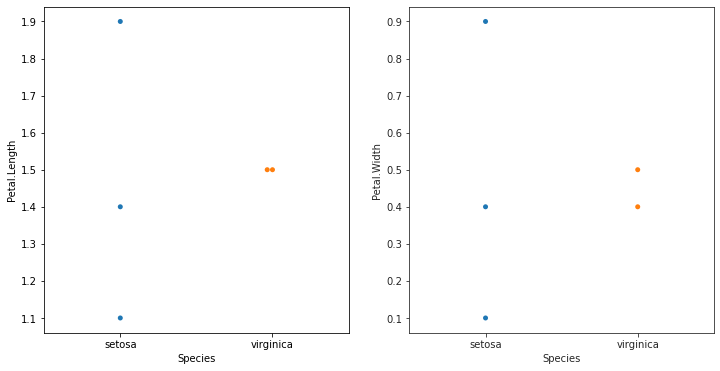

In [8]:
plt.figure(1,figsize=(12,6))

plt.subplot(1,2,1)
sns.swarmplot(x='Species',y='Petal.Length',data=iris) 

with sns.axes_style("ticks"): # 这次使用了ticks风格
    plt.subplot(1,2,2)
    sns.swarmplot(x='Species',y='Petal.Width',data=iris)

plt.show()

### 箱式Boxplot

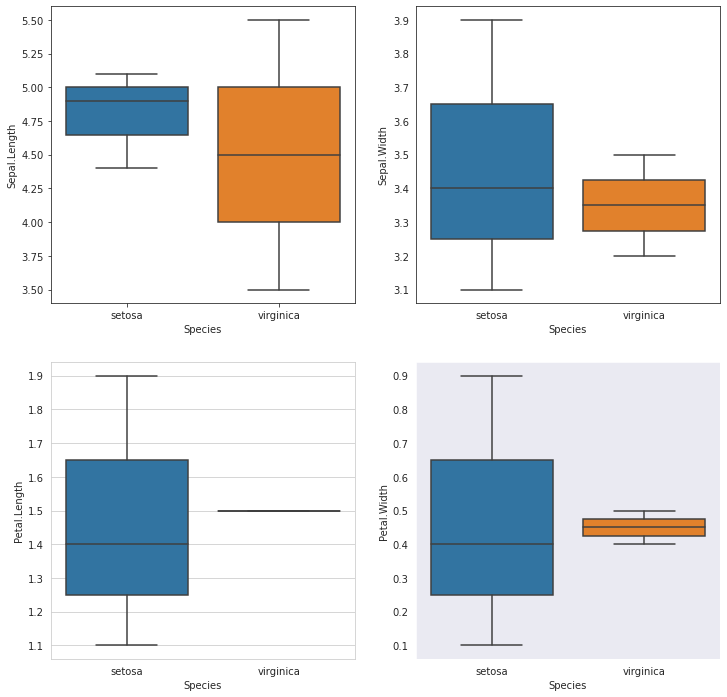

In [9]:
var = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']
axes_style = ['ticks','white','whitegrid', 'dark']

fig = plt.figure(1,figsize=(12,12))

for i in range(4):
    with sns.axes_style(axes_style[i]): # 将除了默认的darkgrid之外的样式都展现一遍
        plt.subplot(2,2,i+1)
        sns.boxplot(x='Species',y=var[i],data=iris)

plt.show()

### 小提琴Violinplot


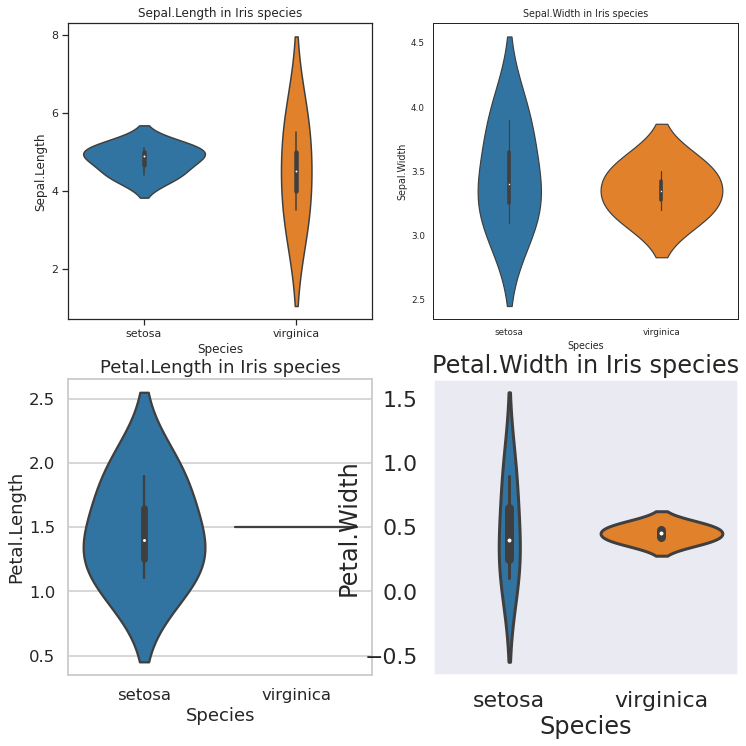

In [10]:
context= ['notebook','paper','talk','poster']
axes_style = ['ticks','white','whitegrid', 'dark']

plt.figure(1,figsize=(12,12))
for i in range(4):
    with sns.axes_style(axes_style[i]):#设置axes_style
        sns.set_context(context[i]) # 设置context style,默认为notebook,除此之外还有paper,talk,poster
        plt.subplot(2,2,i+1)
        plt.title(str(var[i])+ ' in Iris species')
        sns.violinplot(x='Species',y=var[i],data=iris)

plt.show()

### 分布密度图distribution visualization


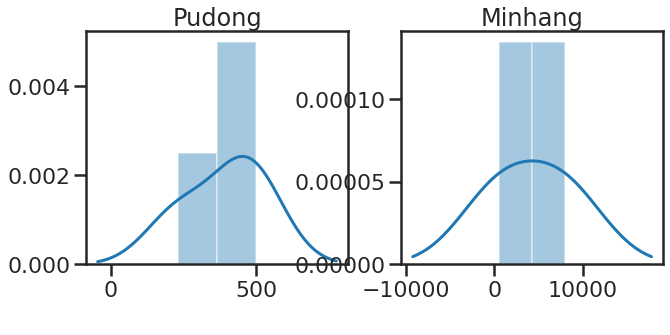

In [13]:
# 导入绘图的包
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sh = pd.DataFrame({'xiaoqu':['梅园六街坊','碧云新天地（一期）','博山小区','金桥新村四街坊（博兴路986弄','博山小区'],'huxing':['2室0厅','2室0厅','2室0厅','2室0厅','2室0厅'],'Area':[111.232,1.9,45.4,65.5,121.5],'Dist':['Pudong','Pudong','Pudong','Minhang','Minhang'],'Floor':['低区/6层	','低区/6层	','低区/6层	','低区/6层	','低区/6层'],'Face':['朝南','朝南','朝南','朝南','朝南'],'Tprice':[500,232,444,543,8000],'Price':[104777,104777,	54777,	67210,	59089],'Time':['1992年建','2002年建','1999年建','1996年建','1994年建']})
## 作图
dist = sh.Dist.unique()
plt.figure(1,figsize=(16,30))
with sns.axes_style("ticks"):
    for i in range(len(dist)):
        temp = sh[sh.Dist == dist[i]]
        plt.subplot(6,3,i+1)
        plt.title(dist[i])
        sns.distplot(temp.Tprice)
        plt.xlabel(' ')
    
plt.show()

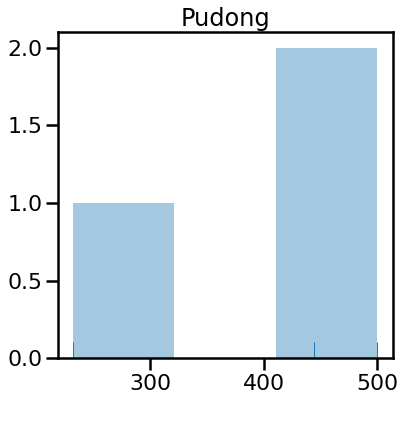

In [19]:
# 单独取出(Pudong)的数据，对kde和rug这两个参数进行设置，做出的直方图如下。
temp = sh[sh.Dist == 'Pudong']
plt.figure(1,figsize=(6,6))
plt.title('Pudong')
sns.distplot(temp.Tprice,kde=False,bins=3,rug=True)
plt.xlabel(' ')
plt.show()

### 两个变量(pairs)可视化

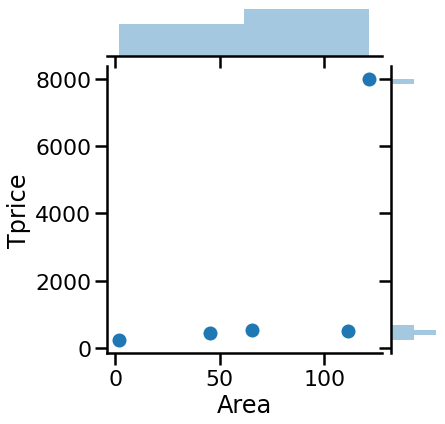

In [20]:
sns.jointplot(x='Area',y='Tprice',data=sh)
plt.show()

### saborn 热力图、时间序列、线性回归

seaborn中的plot function:

* heatmap: 用颜色矩阵去显示数据在两个维度下的度量值    
* tsplot: 用时间维度序列去展现数据的不确定性    
* regplot: 用线性回归模型对数据做拟合
* residplot: 展示线性回归模型拟合后各点对应的残值. 

In [22]:
import pandas as pd
import numpy as np
data = pd.read_csv('./data/earthquake.csv')
data['Date']=pd.to_datetime(data['Date'],utc=True)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
#筛选出地震得类型
data = data[data['Type'] == 'Earthquake']
data.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year,Month
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1


countplot作图

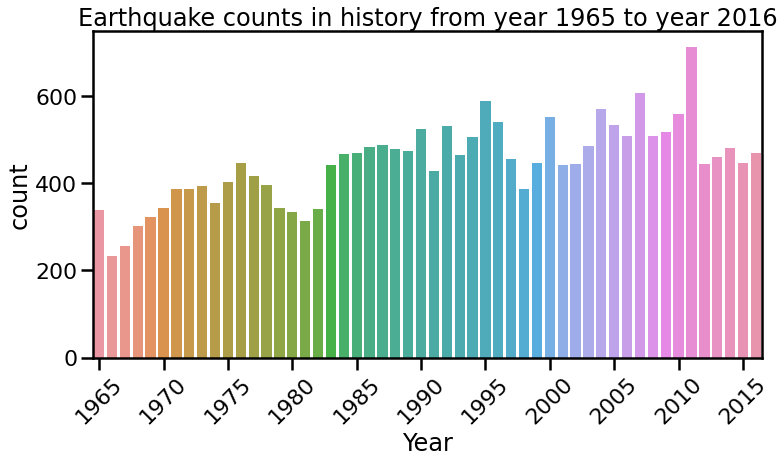

In [23]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(12,6))
Year = [i for i in range(1965,2017,5)]
idx = [i for i in range(0,52,5)]
sns.countplot(data['Year'])
#设置字符串为刻度
plt.setp(plt.xticks(idx,Year)[1],rotation=45)
plt.title('Earthquake counts in history from year 1965 to year 2016')
plt.show()

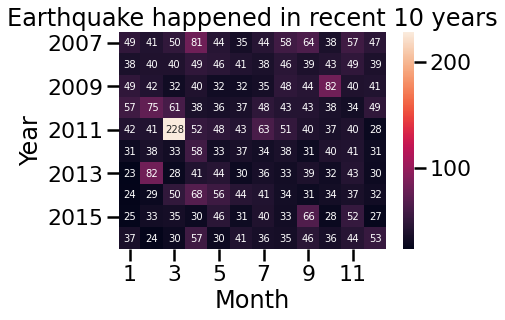

In [28]:
# 作热力图heatmap去看看近十年来的地震记录
test = data.groupby([data['Year'],data['Month']],as_index=False).count()
new = test[['Year','Month','ID']]
#最近10年
temp = new.iloc[-120:,:]
temp = temp.pivot('Year','Month','ID')
sns.heatmap(temp,annot=True, fmt="d")

plt.title('Earthquake happened in recent 10 years')
plt.show()

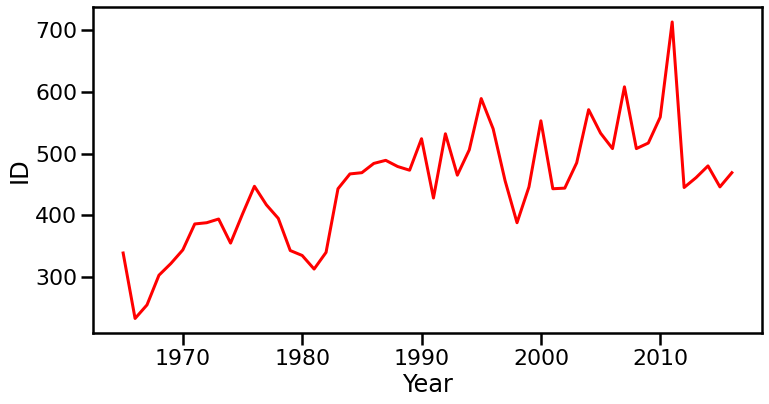

In [33]:
temp = data.groupby('Year',as_index=False).count()
temp = temp.loc[:,['Year','ID']]
plt.figure(1,figsize=(12,6))
sns.lineplot(temp.Year,temp.ID,color="r")
# sns.lineplot(data=temp, palette="tab10", linewidth=2.5)
plt.show()

##年为单位的地震记录作线性回归拟合

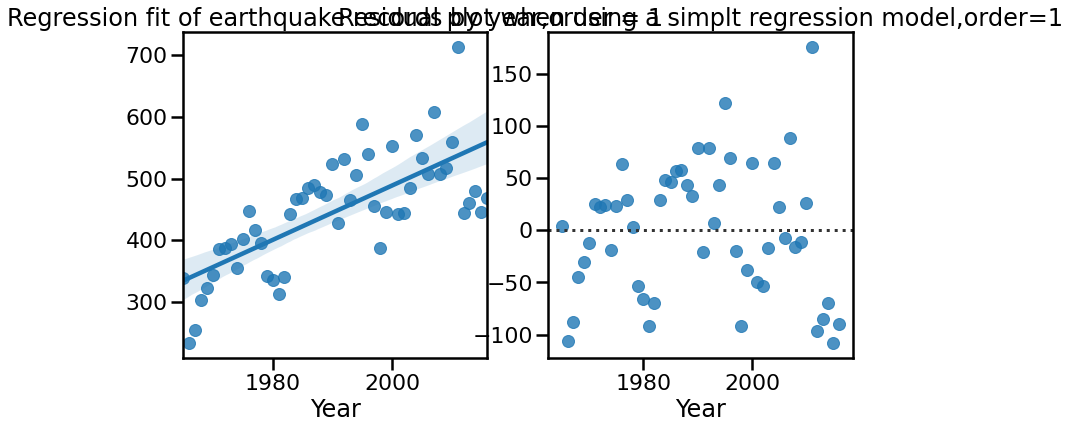

In [50]:
plt.figure(figsize=(12,6))
# 绘制数据并拟合线性回归模型。
plt.subplot(121)
sns.regplot(x="Year", y="ID", data=temp,order=1) # default by 1
plt.ylabel(' ')
plt.title('Regression fit of earthquake records by year,order = 1')

# 绘制线性回归的残差。
plt.subplot(122)
sns.residplot(x="Year", y="ID", data=temp)
plt.ylabel(' ')
plt.title('Residual plot when using a simplt regression model,order=1')
plt.show()

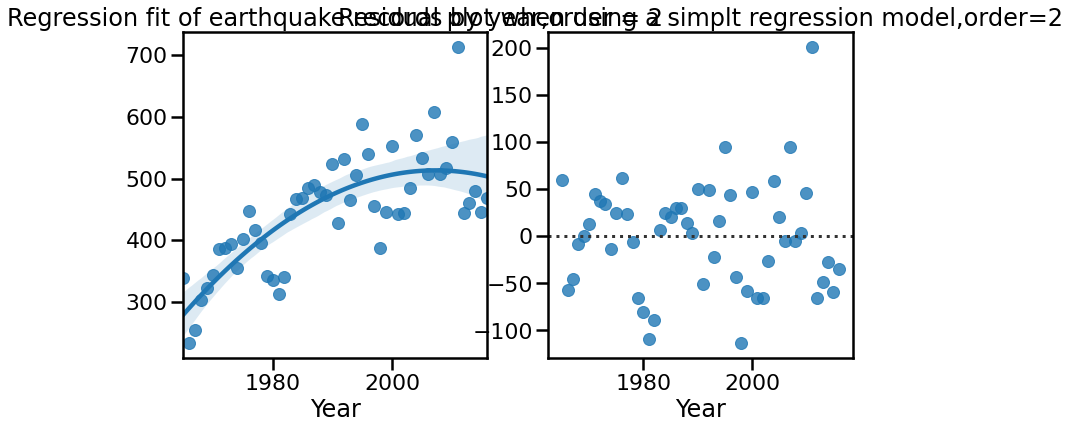

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(x="Year", y="ID", data=temp,order=2) # 二维
plt.ylabel(' ')
plt.title('Regression fit of earthquake records by year,order = 2')

plt.subplot(122)
sns.residplot(x="Year", y="ID", data=temp,order=2)
plt.ylabel(' ')
plt.title('Residual plot when using a simplt regression model,order=2')

plt.show()

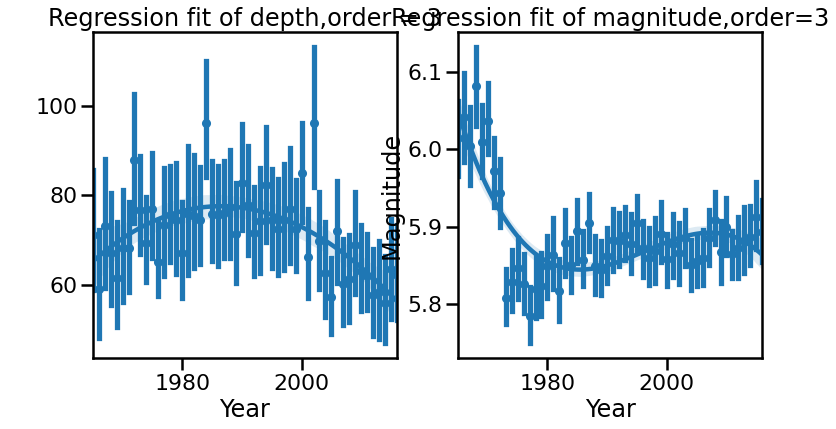

In [39]:
# 对地震记录中的深度Depth和强度Magnitude做线性拟合。
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(x="Year", y="Depth", data=data,x_jitter=.05, x_estimator=np.mean,order=3)
  # x_estimator是一个参数，相当于对每年地震记录中参数取平均值，探究平均值的趋势
plt.ylabel(' ')
plt.title('Regression fit of depth,order = 3')

plt.subplot(122)
sns.regplot(x="Year", y="Magnitude", data=data,x_jitter=.05, x_estimator=np.mean,order=3)
    # x_estimator是一个参数，相当于对每年地震记录中参数取平均值，探究平均值的趋势
plt.title('Regression fit of magnitude,order=3')
plt.show()

[更多官方示例](http://seaborn.pydata.org/examples/index.html)